In [1]:
#import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import os

In [2]:
#change working directory and import data
os.chdir("C:\\Users\\bittu.p\\Desktop\\Python")
suv = pd.read_csv("suv_data.csv")

In [3]:
# first 5 rows of data
suv.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510.0,Male,19.0,19000.0,0.0
1,15810944.0,Male,35.0,20000.0,0.0
2,15668575.0,Female,26.0,43000.0,0.0
3,15603246.0,Female,27.0,57000.0,0.0
4,15804002.0,Male,19.0,76000.0,0.0


In [4]:
#description of dataset
suv.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


<AxesSubplot:xlabel='EstimatedSalary', ylabel='count'>

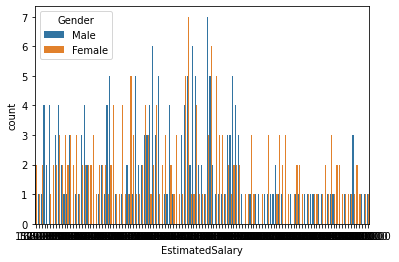

In [5]:
#counter plot of dataset
sns.countplot(x="EstimatedSalary", hue="Gender" , data=suv)

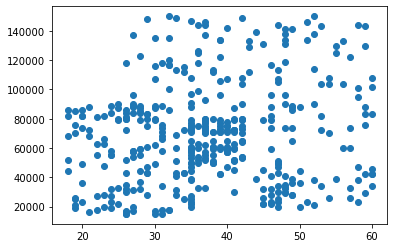

In [6]:
#scatterplot of dataset
x = suv["Age"]
y = suv["EstimatedSalary"]
plt.scatter(x, y)
plt.show()

<AxesSubplot:ylabel='Frequency'>

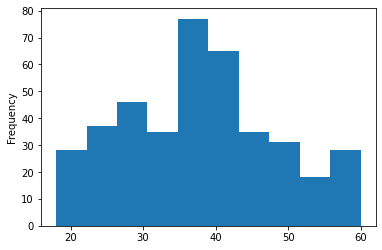

In [7]:
#histogram of dataset of age column
suv["Age"].plot.hist()

In [8]:
#import libraries for normal distribution curve
import scipy.stats as stats
from scipy.stats import norm
import statistics

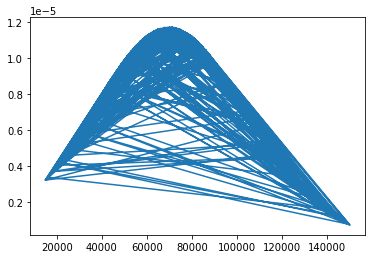

In [9]:
#normal distribution curve with frequency of data
x_axis = suv["EstimatedSalary"]
  
# Calculating mean and standard deviation
mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)
  
plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
plt.show()

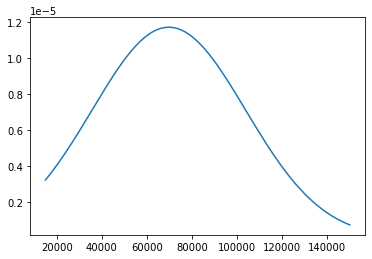

In [10]:
#normal desrtibution curve
pdf = stats.norm.pdf(suv["EstimatedSalary"].sort_values(), mean, sd)

# Drawing a graph
plt.plot(suv["EstimatedSalary"].sort_values(), pdf)
plt.show()

In [11]:
#check null values
suv.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

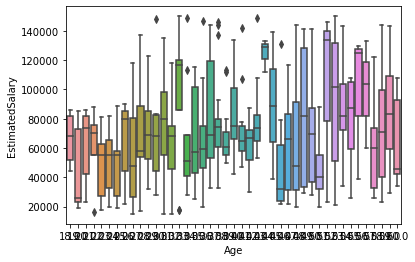

In [12]:
#box plot
sns.boxplot(x= "Age", y = "EstimatedSalary" , data = suv)

In [13]:
#make male as 1 and female as 0 in gender column of dataset
Gender = pd.get_dummies(suv["Gender"], drop_first=True)

In [14]:
#define dependent and independent variables
X = suv.iloc[:,[2,3]]
y = suv.iloc[:,4]

In [15]:
#library for split training and test data
from sklearn.model_selection import train_test_split

In [16]:
#training data = 75% and testing data is 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [17]:
#import sklearn library for standard scaler
from sklearn.preprocessing import StandardScaler

In [18]:
#make standard scaler to increase the accuracy and reduce error that occcurs for different units of columns in dataset
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [19]:
#import sklearn library for logistics Regression
from sklearn.linear_model import LogisticRegression

In [20]:
#apply logistics Regression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train , y_train)

LogisticRegression(random_state=0)

In [21]:
#prediction
prediction = classifier.predict(X_test)

In [22]:
#library for check accuracy score 
from sklearn.metrics import accuracy_score

In [23]:
#accuracy score
accuracy_score(y_test, prediction)

0.89